# **CS 4650 - Natural Language Processing Group Project**
# Authorship Analysis - Group 22

Members:

Rob McDonald, Avalyn Mullikin, Jacob Rogers, V Verity





This notebook sets up the environment for a text-based authorship attribution pipeline. All inputs are plain text stories—no OCR. We use poems from different authors as our dataset, sourced from [Project Gutenburg](https://www.gutenberg.org/). The poems are downloaded as books of multiple poems. The poems were manually cleaned before being preprocessed into separate txt files.



## 1. Environment Setup
Install system and Python dependencies.

1. Install NLP dependencies

In [ ]:
!pip install nltk scikit-learn sentence-transformers torch pandas numpy matplotlib

Change this if GitHub repo URL changes:

In [ ]:
import os
from pathlib import Path

# Move to a known parent directory
%cd /content

REPO_URL = "https://github.com/jacobcohenrogers/NLPProjGroup22.git"
REPO_NAME = Path(REPO_URL).stem

if not os.path.isdir(REPO_NAME):
    print(f"Cloning {REPO_NAME} into /content...")
    !git clone {REPO_URL}
else:
    print(f"Repository {REPO_NAME} already exists in /content.")

# Enter the repo dir
%cd {REPO_NAME}

/content
Cloning NLPProjGroup22 into /content...
Cloning into 'NLPProjGroup22'...
remote: Enumerating objects: 1628, done.
remote: Counting objects: 100% (1628/1628), done.
remote: Compressing objects: 100% (1588/1588), done.
remote: Total 1628 (delta 14), reused 1623 (delta 12), pack-reused 0 (from 0)
Receiving objects: 100% (1628/1628), 3.26 MiB | 11.45 MiB/s, done.
Resolving deltas: 100% (14/14), done.
/content/NLPProjGroup22


Make directories

In [ ]:
import os
from pathlib import Path

# Define base and data directories
BASE_DIR = Path.cwd()
DATA_DIR = BASE_DIR / 'data'
RAW_TEXT_DIR = DATA_DIR / 'raw_text'
MANIFEST_PATH = DATA_DIR / 'manifest.csv'

# Create necessary directories
for folder in [RAW_TEXT_DIR]:
    folder.mkdir(parents=True, exist_ok=True)

print("Directories set up:")
print(f" - RAW_TEXT_DIR: {RAW_TEXT_DIR}")
print(f" - Manifest will be created at: {MANIFEST_PATH}")

Directories set up:
 - RAW_TEXT_DIR: /content/NLPProjGroup22/data/raw_text
 - Manifest will be created at: /content/NLPProjGroup22/data/manifest.csv


Create manifest document (.csv)

In [ ]:
!python src/create_manifest.py

Wrote manifest with 1519 entries to /content/NLPProjGroup22/data/manifest.csv


In [ ]:
from src.preprocessing import load_and_preprocess
import pandas as pd

import nltk
nltk.download('punkt', quiet=False)

# Load the manifest
manifest_df = pd.read_csv(MANIFEST_PATH)
print(f"Loaded {len(manifest_df)} records from manifest.")

# Apply preprocessing to each record
processed_records = []
for _, row in manifest_df.iterrows():
    file_path = BASE_DIR / row['file_path']
    result = load_and_preprocess(file_path)
    processed_records.append({
        'file_path': row['file_path'],
        'author': row['author'],
        'prompt': row['prompt'],
        'split': row['split'],
        'clean_text': result['clean_text'],
        'num_sentences': len(result['sentences']),
        'num_words': len(result['words']),
        'tokens': result['words']
    })

processed_df = pd.DataFrame(processed_records)
# Optionally persist for later stages
processed_df.to_pickle(DATA_DIR / 'processed.pkl')
print(f"Preprocessed {len(processed_df)} texts and saved to processed.pkl")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Loaded 1519 records from manifest.
Preprocessed 1519 texts and saved to processed.pkl


In [ ]:
from src.feature_extraction import (
    extract_stylometric_features,
    char_ngram_features,
    pos_tag_features,
    embedding_features
)

import nltk
nltk.download('averaged_perceptron_tagger_eng')

# Load preprocessed data
processed_df = pd.read_pickle(DATA_DIR / 'processed.pkl')

# Extract features
style_df = extract_stylometric_features(processed_df)
ngram_df = char_ngram_features(processed_df)
pos_df = pos_tag_features(processed_df)
emb_df = embedding_features(processed_df)

# Combine and save
features_df = style_df.join([ngram_df, pos_df, emb_df]).reset_index()
FEATURES_PATH = DATA_DIR / 'features.csv'
features_df.to_csv(FEATURES_PATH, index=False)
print(f"Extracted features matrix with shape {features_df.shape} to {FEATURES_PATH}")

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/95 [00:00<?, ?it/s]

Extracted features matrix with shape (1519, 517) to /content/NLPProjGroup22/data/features.csv


In [ ]:
from src.modeling import load_data, train_models, evaluate_models, save_models

X_train, X_test, y_train, y_test = load_data('data/features.csv')
models = train_models(X_train, y_train)
results = evaluate_models(models, X_test, y_test)
save_paths = save_models(models, 'models')

In [ ]:
from src.inspection import (
    load_models,
    classification_report_df,
    confusion_matrix_df,
    top_feature_importances
)

# Load test split
X_train, X_test, y_train, y_test = load_data(str(FEATURES_PATH))
models = load_models('models')

# View classification report for Random Forest
rf_report = classification_report_df(models['random_forest'], X_test, y_test)
print(rf_report)

# View confusion matrix
rf_cm = confusion_matrix_df(models['random_forest'], X_test, y_test)
print(rf_cm)

# Show top 10 important features
feature_names = X_train.columns.tolist()
rf_importances = top_feature_importances(models['random_forest'], feature_names, top_n=10)
print(rf_importances)

                precision    recall  f1-score     support
Emilydickinson   0.720339  0.944444  0.817308   90.000000
Frost            1.000000  0.100000  0.181818   10.000000
Robertburns      0.892562  0.939130  0.915254  115.000000
Shakespeare      1.000000  0.838710  0.912281   31.000000
Waltwhitman      0.925000  0.616667  0.740000   60.000000
accuracy         0.839869  0.839869  0.839869    0.839869
macro avg        0.907580  0.687790  0.713332  306.000000
weighted avg     0.862664  0.839869  0.827813  306.000000
                Emilydickinson  Frost  Robertburns  Shakespeare  Waltwhitman
Emilydickinson              85      0            5            0            0
Frost                        6      1            1            0            2
Robertburns                  7      0          108            0            0
Shakespeare                  2      0            2           26            1
Waltwhitman                 18      0            5            0           37
            feat

**Normalized based on number of poems per author** \
Slightly better results across authors

In [ ]:
from src.modeling import train_models, evaluate_models, save_models
from src.inspection import classification_report_df, confusion_matrix_df, top_feature_importances

import pandas as pd
from pathlib import Path

# Load full feature set
features_path = Path("data/features.csv")
df = pd.read_csv(features_path)

# Determine which author has the least poems
min_count = df['author'].value_counts().min()

# Get the same amount of rows per author
df_balanced = (df.groupby('author', group_keys=False).apply(lambda x: x.sample(n=min_count, random_state=42)).reset_index(drop=True))

# Split into train/test
train_df = df_balanced[df_balanced['split']== 'training']
test_df  = df_balanced[df_balanced['split']== 'testing']

X_train = train_df.drop(columns=['file_path', 'author', 'prompt', 'split'])
y_train = train_df['author']
X_test = test_df.drop(columns=['file_path', 'author', 'prompt', 'split'])
y_test = test_df['author']

# Train and evaluate models
balanced_models = train_models(X_train, y_train)
balanced_results = evaluate_models(balanced_models, X_test, y_test)

# Save models?
# save_models(balanced_models, "models_balanced")

# Show classification report and confusion matrix for Random Forest
rf_report_balanced = classification_report_df(balanced_models['random_forest'], X_test, y_test)
print(rf_report_balanced)

rf_cm_balanced = confusion_matrix_df(balanced_models['random_forest'], X_test, y_test)
print(rf_cm_balanced)

# Show top feature importances
feature_names = X_train.columns.tolist()
rf_importances_balanced = top_feature_importances(balanced_models['random_forest'], feature_names, top_n=10)
print(rf_importances_balanced)


<ipython-input-8-d8b346c31bfb>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = (df.groupby('author', group_keys=False).apply(lambda x: x.sample(n=min_count, random_state=42)).reset_index(drop=True))


                precision    recall  f1-score  support
Emilydickinson   0.888889  0.800000  0.842105  10.0000
Frost            0.727273  0.800000  0.761905  10.0000
Robertburns      0.909091  1.000000  0.952381  10.0000
Shakespeare      0.818182  1.000000  0.900000   9.0000
Waltwhitman      0.666667  0.444444  0.533333   9.0000
accuracy         0.812500  0.812500  0.812500   0.8125
macro avg        0.802020  0.808889  0.797945  48.0000
weighted avg     0.804503  0.812500  0.801331  48.0000
                Emilydickinson  Frost  Robertburns  Shakespeare  Waltwhitman
Emilydickinson               8      1            0            0            1
Frost                        1      8            0            0            1
Robertburns                  0      0           10            0            0
Shakespeare                  0      0            0            9            0
Waltwhitman                  0      2            1            2            4
          feature  importance
0  pos_noun_r

# LSTM

In [ ]:

# Download GloVe embeddings (if we don't have them)

import os
import zipfile
import requests
from pathlib import Path

# Define where to store glove
GLOVE_DIR = Path("glove")
GLOVE_ZIP = GLOVE_DIR / "glove.6B.zip"

# Create dir if needed
GLOVE_DIR.mkdir(parents=True, exist_ok=True)

# Download glove vectors if they aren't already there
if not (GLOVE_DIR / "glove.6B.100d.txt").exists():
    print("Downloading embeddings...")
    url = "http://nlp.stanford.edu/data/glove.6B.zip"
    r = requests.get(url, stream=True)
    with open(GLOVE_ZIP, "wb") as f:
        for chunk in r.iter_content(chunk_size=8192):
            if chunk:
                f.write(chunk)

    # Unzip it
    with zipfile.ZipFile(GLOVE_ZIP, 'r') as zip_ref:
        zip_ref.extractall(GLOVE_DIR)

    print("Downloaded and extracted glove")

else:
    print("glove already downloaded")


Downloaded and extracted glove


In [ ]:

# Build vocab from poems and create GloVe matrix

import pandas as pd
import numpy as np

# Load processed poems
processed_df = pd.read_pickle("data/processed.pkl")

# Flatten all words into one big list
all_words = []
for tokens in processed_df['tokens']:
    all_words.extend(tokens)

# Build vocab: just grab all unique words
vocab = sorted(set(all_words))
print(f"Vocab size: {len(vocab)} words")

# Map words to indices
word_to_idx = {word: idx + 1 for idx, word in enumerate(vocab)}  # idx +1 to reserve 0 for padding
idx_to_word = {idx: word for word, idx in word_to_idx.items()}

# Load glove
glove_path = "glove/glove.6B.100d.txt"
embedding_dim = 100

# Build word to vector dictionary
glove_embeddings = {}
with open(glove_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.strip().split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = vector

print(f"Loaded {len(glove_embeddings)} GloVe word vectors.")

# Now let's build the embedding matrix
embedding_matrix = np.zeros((len(vocab) + 1, embedding_dim))  # +1 for padding index 0

for word, idx in word_to_idx.items():
    vec = glove_embeddings.get(word)
    if vec is not None:
        embedding_matrix[idx] = vec
    else:
        # If the word isn't found, leave it as zeros or maybe random init
        pass

print(f"Embedding matrix shape: {embedding_matrix.shape}")


Vocab size: 40392 words
Loaded 400000 GloVe word vectors.
Embedding matrix shape: (40393, 100)


In [ ]:

# Create PyTorch Dataset and Dataloader

import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# map author names to numeric labels
authors = sorted(processed_df['author'].unique())
author_to_idx = {author: idx for idx, author in enumerate(authors)}
idx_to_author = {idx: author for author, idx in author_to_idx.items()}

# Now create input sequences (word indices) and targets (author labels)
poem_sequences = []
poem_labels = []

for _, row in processed_df.iterrows():
    tokens = row['tokens']
    idx_seq = [word_to_idx.get(word, 0) for word in tokens]  # 0 for OOV/padding
    label = author_to_idx[row['author']]

    poem_sequences.append(idx_seq)
    poem_labels.append(label)

# Split into train/test
train_seqs, test_seqs, train_labels, test_labels = train_test_split(
    poem_sequences, poem_labels, test_size=0.2, random_state=42, stratify=poem_labels
)

# Define a PyTorch Dataset
class PoemDataset(Dataset):
    def __init__(self, sequences, labels, max_len=200):
        self.sequences = sequences
        self.labels = labels
        self.max_len = max_len

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        seq = self.sequences[idx]
        label = self.labels[idx]

        # Pad or truncate
        if len(seq) < self.max_len:
            seq = seq + [0] * (self.max_len - len(seq))
        else:
            seq = seq[:self.max_len]

        return torch.tensor(seq, dtype=torch.long), torch.tensor(label, dtype=torch.long)

# Create datasets
train_dataset = PoemDataset(train_seqs, train_labels)
test_dataset = PoemDataset(test_seqs, test_labels)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

print(f"Train size: {len(train_dataset)}, Test size: {len(test_dataset)}")


Train size: 1215, Test size: 304


In [ ]:

# Improved LSTM model with Dropout

import torch.nn as nn

class PoemLSTM(nn.Module):
    def __init__(self, embedding_matrix, hidden_dim=128, num_classes=len(authors), dropout_rate=0.3):
        super(PoemLSTM, self).__init__()

        vocab_size, embedding_dim = embedding_matrix.shape

        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))
        self.embedding.weight.requires_grad = True  # still fine-tuning

        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=1,
            batch_first=True,
            bidirectional=True
        )

        # Dropout after LSTM to prevent overfitting
        self.dropout = nn.Dropout(dropout_rate)

        # Fully connected output layer
        self.fc = nn.Linear(hidden_dim * 2, num_classes)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        out = lstm_out[:, -1, :]  # take last hidden state
        out = self.dropout(out)   # apply dropout
        logits = self.fc(out)
        return logits

# Instantiate updated model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = PoemLSTM(embedding_matrix)
model = model.to(device)

print(f"Model has {sum(p.numel() for p in model.parameters())} parameters.")



Model has 4276105 parameters.


**Train - takes forever**

In [ ]:

# Training loop for LSTM


import torch.optim as optim
from sklearn.metrics import accuracy_score

# Set up loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-4)

# Training settings
num_epochs = 15  # bump up if needed

train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for batch_inputs, batch_labels in train_loader:
        batch_inputs = batch_inputs.to(device)
        batch_labels = batch_labels.to(device)

        optimizer.zero_grad()
        outputs = model(batch_inputs)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Evaluate on test set
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch_inputs, batch_labels in test_loader:
            batch_inputs = batch_inputs.to(device)
            batch_labels = batch_labels.to(device)

            outputs = model(batch_inputs)
            preds = outputs.argmax(dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch_labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    test_accuracies.append(acc)

    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {avg_train_loss:.4f} - Test Acc: {acc:.4f}")


Epoch 1/15 - Loss: 1.5871 - Test Acc: 0.3980
Epoch 2/15 - Loss: 1.4542 - Test Acc: 0.3783
Epoch 3/15 - Loss: 1.3553 - Test Acc: 0.4013
Epoch 4/15 - Loss: 1.3199 - Test Acc: 0.4309
Epoch 5/15 - Loss: 1.3262 - Test Acc: 0.4079
Epoch 6/15 - Loss: 1.3053 - Test Acc: 0.4474
Epoch 7/15 - Loss: 1.2786 - Test Acc: 0.4342
Epoch 8/15 - Loss: 1.2626 - Test Acc: 0.4474
Epoch 9/15 - Loss: 1.2412 - Test Acc: 0.5033
Epoch 10/15 - Loss: 1.2265 - Test Acc: 0.4013
Epoch 11/15 - Loss: 1.3132 - Test Acc: 0.4243
Epoch 12/15 - Loss: 1.2505 - Test Acc: 0.4868
Epoch 13/15 - Loss: 1.1968 - Test Acc: 0.5559
Epoch 14/15 - Loss: 1.1497 - Test Acc: 0.5296
Epoch 15/15 - Loss: 1.3140 - Test Acc: 0.4276


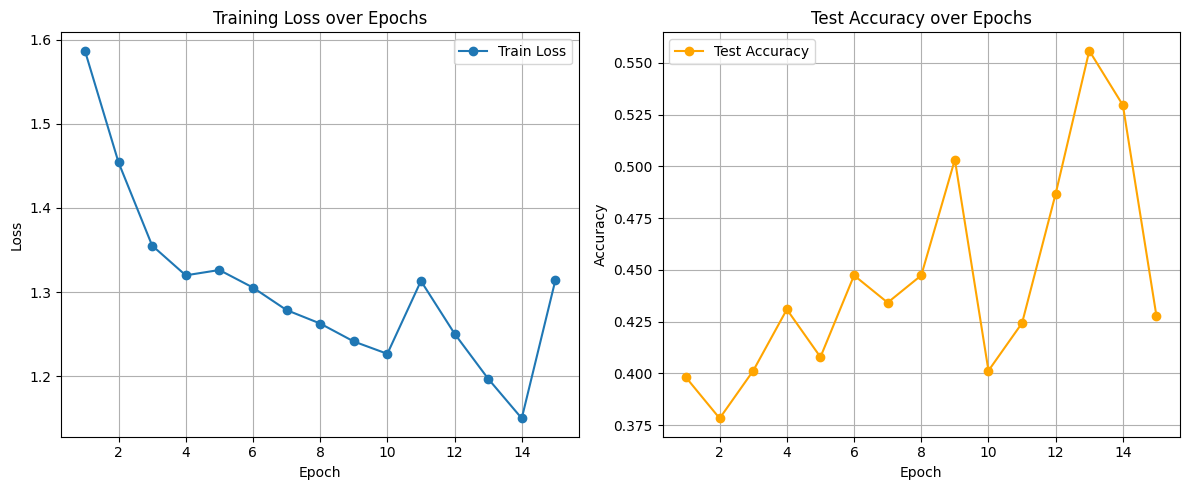

In [ ]:

# Plot train loss and test accuracy curves


import matplotlib.pyplot as plt

epochs = list(range(1, len(train_losses) + 1))

plt.figure(figsize=(12,5))

# Plot training loss
plt.subplot(1,2,1)
plt.plot(epochs, train_losses, label="Train Loss", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.grid()
plt.legend()

# Plot test accuracy
plt.subplot(1,2,2)
plt.plot(epochs, test_accuracies, label="Test Accuracy", marker='o', color='orange')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Test Accuracy over Epochs")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


Classification Report:
                precision    recall  f1-score   support

Emilydickinson       0.37      0.99      0.54        90
         Frost       0.00      0.00      0.00         9
   Robertburns       0.64      0.32      0.43       115
   Shakespeare       0.00      0.00      0.00        31
   Waltwhitman       0.57      0.07      0.12        59

      accuracy                           0.43       304
     macro avg       0.32      0.28      0.22       304
  weighted avg       0.46      0.43      0.35       304



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


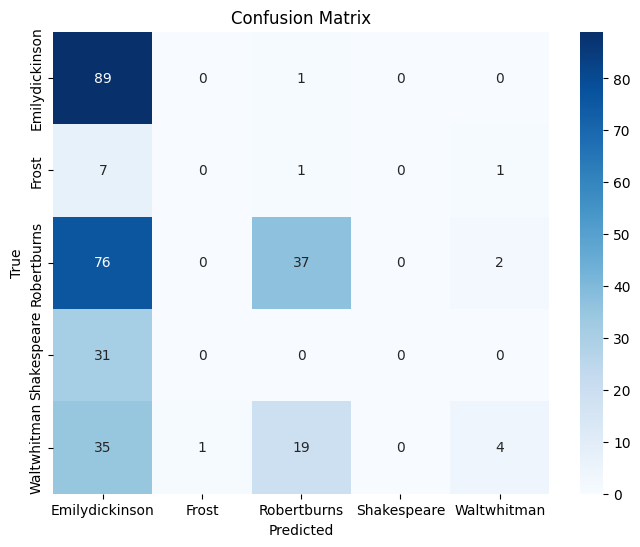

In [ ]:
# Classification report and confusion matrix


from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Make final predictions on test set
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch_inputs, batch_labels in test_loader:
        batch_inputs = batch_inputs.to(device)
        outputs = model(batch_inputs)
        preds = outputs.argmax(dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch_labels.numpy())

# Classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=authors))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=authors, yticklabels=authors)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


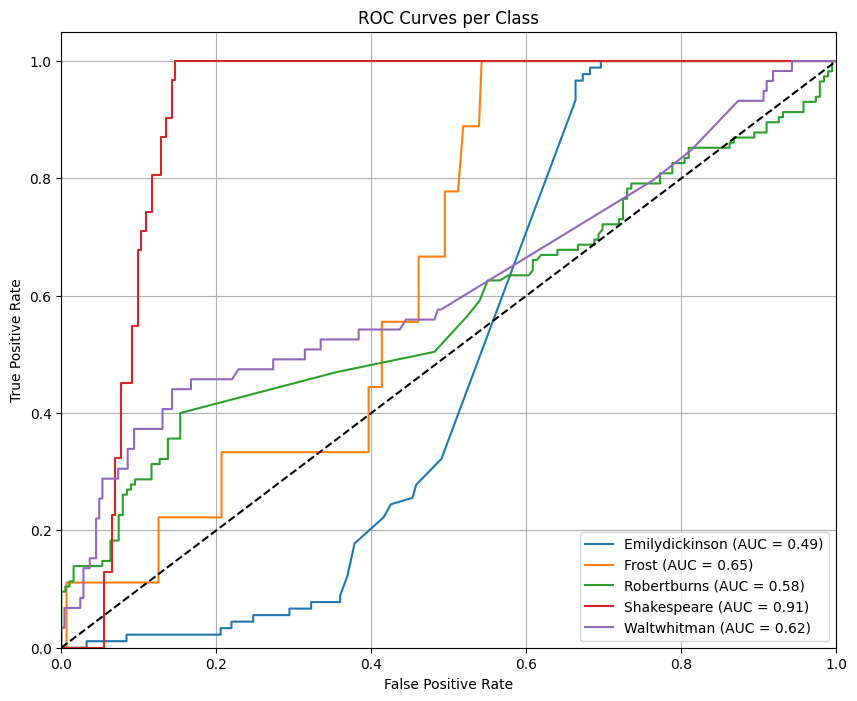

In [ ]:
# ROC curves for each class

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize labels
y_test_bin = label_binarize(all_labels, classes=list(range(len(authors))))
y_pred_probs = []

# Get softmax outputs
model.eval()
with torch.no_grad():
    for batch_inputs, _ in test_loader:
        batch_inputs = batch_inputs.to(device)
        outputs = model(batch_inputs)
        probs = torch.softmax(outputs, dim=1)
        y_pred_probs.extend(probs.cpu().numpy())

y_pred_probs = np.array(y_pred_probs)

# Plot ROC for each class
plt.figure(figsize=(10,8))
for i, author in enumerate(authors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{author} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves per Class")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Transformer

In [ ]:
!pip install transformers datasets -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cu

In [ ]:
# Load BERT tokenizer, dataset, and model

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
import torch

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
num_labels = len(authors)

model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=num_labels
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print(f"Loaded bert with {num_labels} output classes")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loaded bert with 5 output classes


In [ ]:
# Create custom Dataset for BERT
class PoemBERTDataset(Dataset):
    def __init__(self, df, tokenizer, max_len=256):
        self.texts = df['clean_text'].tolist()
        self.labels = [author_to_idx[a] for a in df['author']]
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encodings = self.tokenizer(text, padding="max_length", truncation=True, return_tensors="pt")
        return {"input_ids": encodings["input_ids"].squeeze(0), "attention_mask": encodings["attention_mask"].squeeze(0), "labels": torch.tensor(label, dtype=torch.long)}

# Use your processed_df
train_df = processed_df[processed_df['split'] == 'training']
test_df = processed_df[processed_df['split'] == 'testing']

# Limit size - running over google colab limits
train_dataset = PoemBERTDataset(train_df, tokenizer, max_len=128)
test_dataset = PoemBERTDataset(test_df, tokenizer, max_len=128)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)


In [ ]:
# Training loop for BERT

from torch.optim import AdamW
from sklearn.metrics import accuracy_score

optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

epochs = 5
train_losses = []
test_accuracies = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for batch in train_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Evaluation
    model.eval()
    preds = []
    true_labels = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            pred_labels = logits.argmax(dim=1)

            preds.extend(pred_labels.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(true_labels, preds)
    test_accuracies.append(acc)

    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {avg_train_loss:.4f} - Test Acc: {acc:.4f}")


Epoch 1/5 - Train Loss: 0.6555 - Test Acc: 0.9542
Epoch 2/5 - Train Loss: 0.1326 - Test Acc: 0.9641
Epoch 3/5 - Train Loss: 0.0358 - Test Acc: 0.9837
Epoch 4/5 - Train Loss: 0.0122 - Test Acc: 0.9706
Epoch 5/5 - Train Loss: 0.0067 - Test Acc: 0.9902


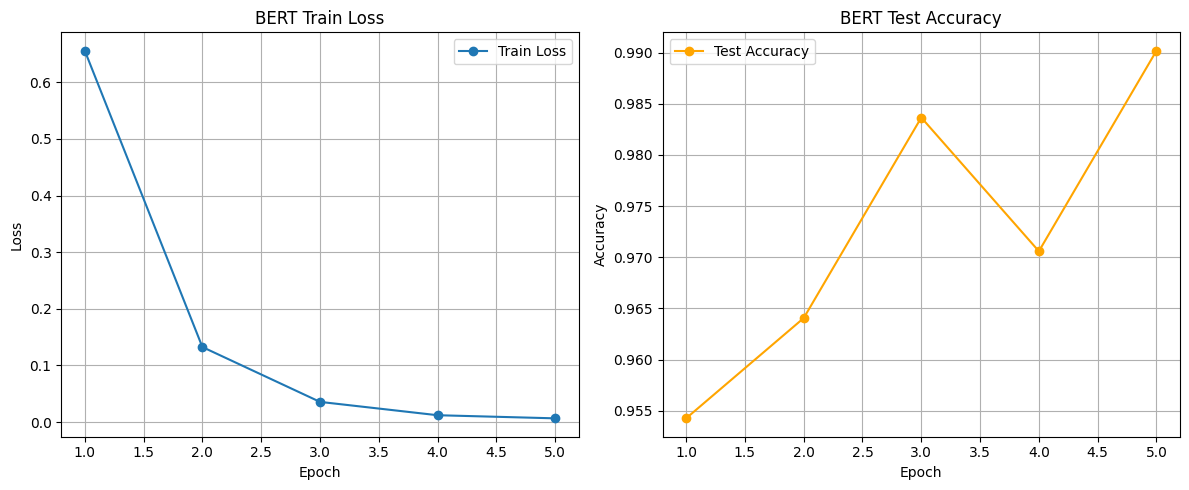

In [ ]:
# Plot BERT train loss and test accuracy curves

import matplotlib.pyplot as plt

epochs_range = list(range(1, len(train_losses) + 1))

plt.figure(figsize=(12,5))

# Training Loss Plot
plt.subplot(1,2,1)
plt.plot(epochs_range, train_losses, marker='o', label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('BERT Train Loss')
plt.grid()
plt.legend()

# Test Accuracy Plot
plt.subplot(1,2,2)
plt.plot(epochs_range, test_accuracies, marker='o', label='Test Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('BERT Test Accuracy')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


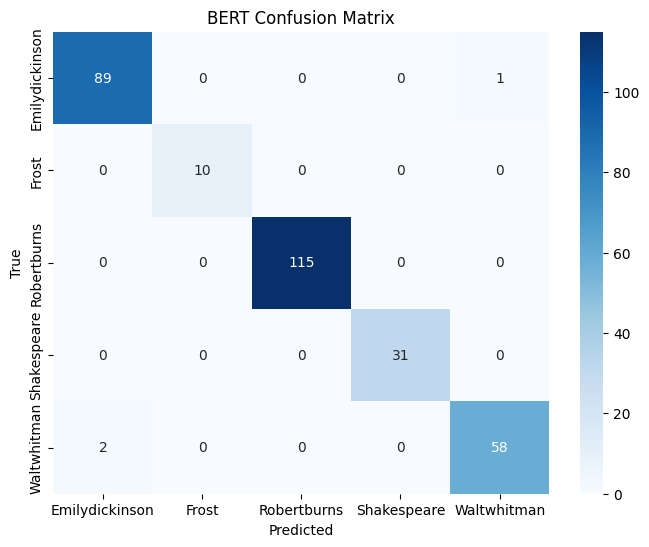

Classification Report:
                precision    recall  f1-score   support

Emilydickinson       0.98      0.99      0.98        90
         Frost       1.00      1.00      1.00        10
   Robertburns       1.00      1.00      1.00       115
   Shakespeare       1.00      1.00      1.00        31
   Waltwhitman       0.98      0.97      0.97        60

      accuracy                           0.99       306
     macro avg       0.99      0.99      0.99       306
  weighted avg       0.99      0.99      0.99       306



In [ ]:
# Confusion Matrix and Classification Report for BERT

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
cm = confusion_matrix(true_labels, preds)

# Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=authors, yticklabels=authors)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('BERT Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(true_labels, preds, target_names=authors))
